# Image Processing CookBook
## Chapter 02
### Author: Sandipan Dey

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/F.CS328/Python-Image-Processing-Cookbook/Chapter 02

In [3]:
# !ls

### Histogram Matching

Histogram matching нь хүссэн гистограммтай зургийг тааруулахын тулд зургийн пикселийн эрчмийг тохируулахад ашигладаг. Гистограмм тааруулах зорилго нь оролтын дүрсийг түүний гистограммыг заасан гистограмтай тааруулахын тулд хувиргах явдал юм. Энэ техник нь зургийн тодосгогчийг сайжруулах, зургийн гистограммыг тэгшитгэх, зургийн өнгөний тэнцвэрийг тохируулах зэрэг олон төрлийн хэрэглээнд хэрэгтэй.

1. Оруулсан зургийн гистограмм болон хүссэн гистограмыг тооцоолох.
2. Оролтын зураг болон хүссэн гистограмын хуримтлагдсан хуваарилалтын функцийг  `cumulative distribution functions` (CDFs) тооцоолох.
3. Оролтын зурган дээрх пикселийн эрчмийг desired гистограмм дахь харгалзах эрчимтэй харьцуулах пикселийн нарийвчлалтай зураглалын функцийг ашиглаж байна.

255 255


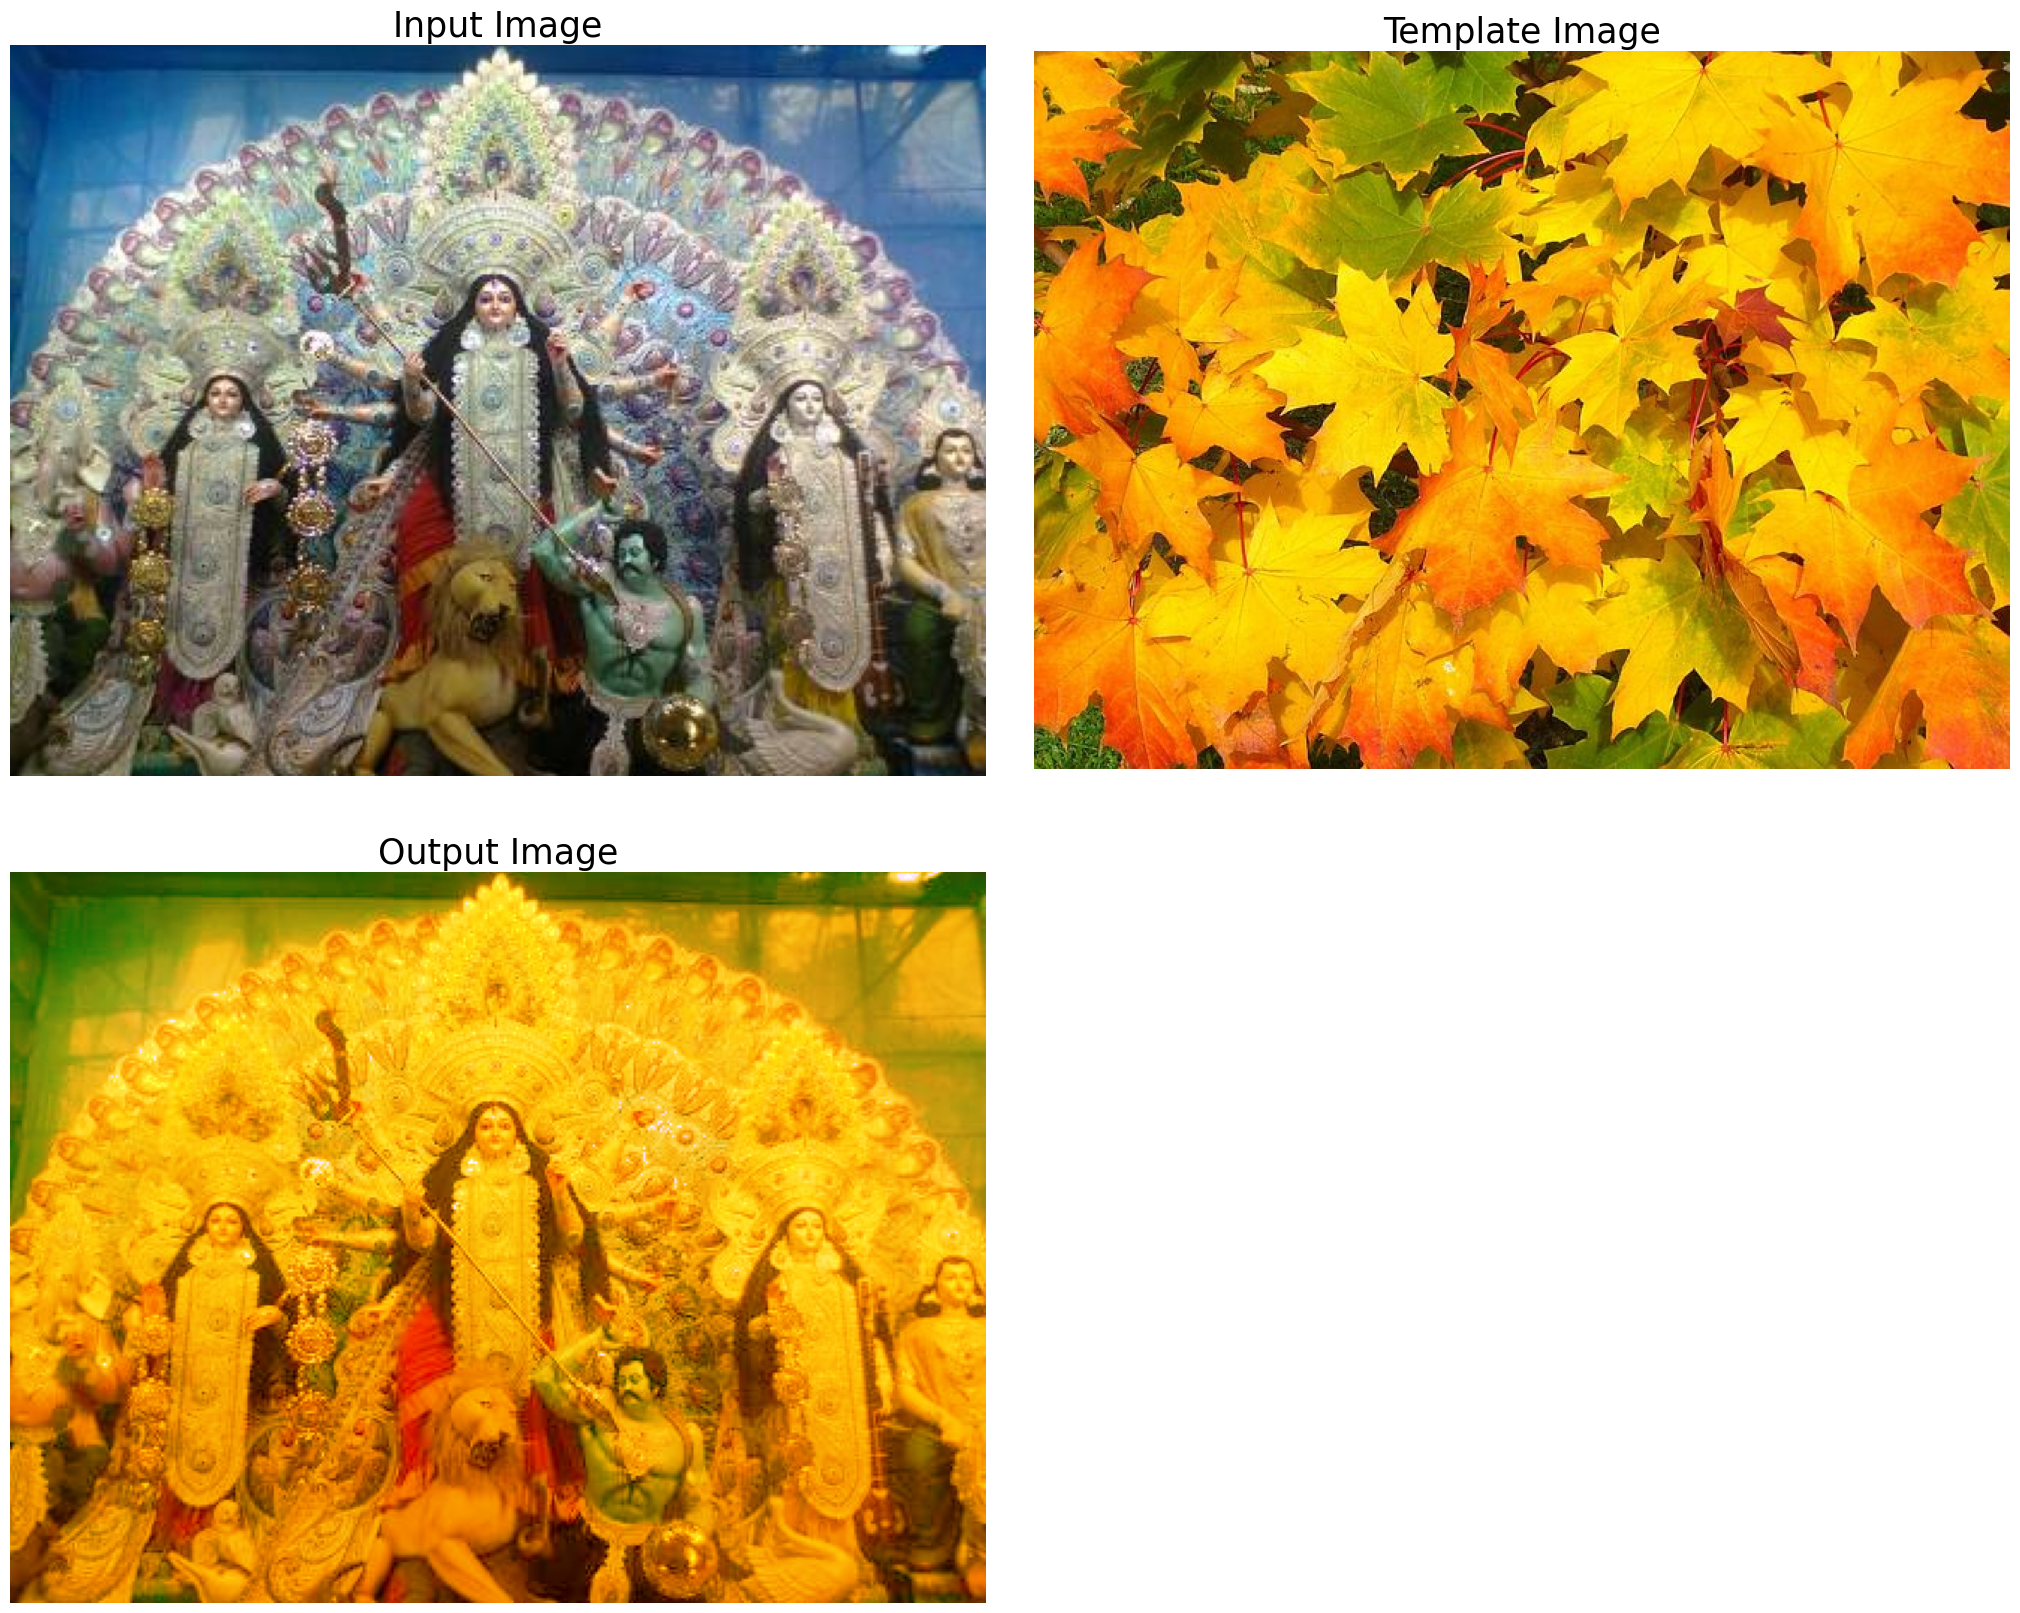

In [4]:
# %matplotlib inline
from skimage.exposure import cumulative_distribution
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt
import numpy as np

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))   # find closest matches to b_t
    pix_repl = {i:b[i] for i in range(256)} # dictionary to replace the pixels
    mp = np.arange(0,256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

def cdf(im):
    c, b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

im = imread('images/goddess.png').astype(np.uint8)
im_t = imread('images/leaves.png')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])

plt.figure(figsize=(20,17))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(223), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

247 255


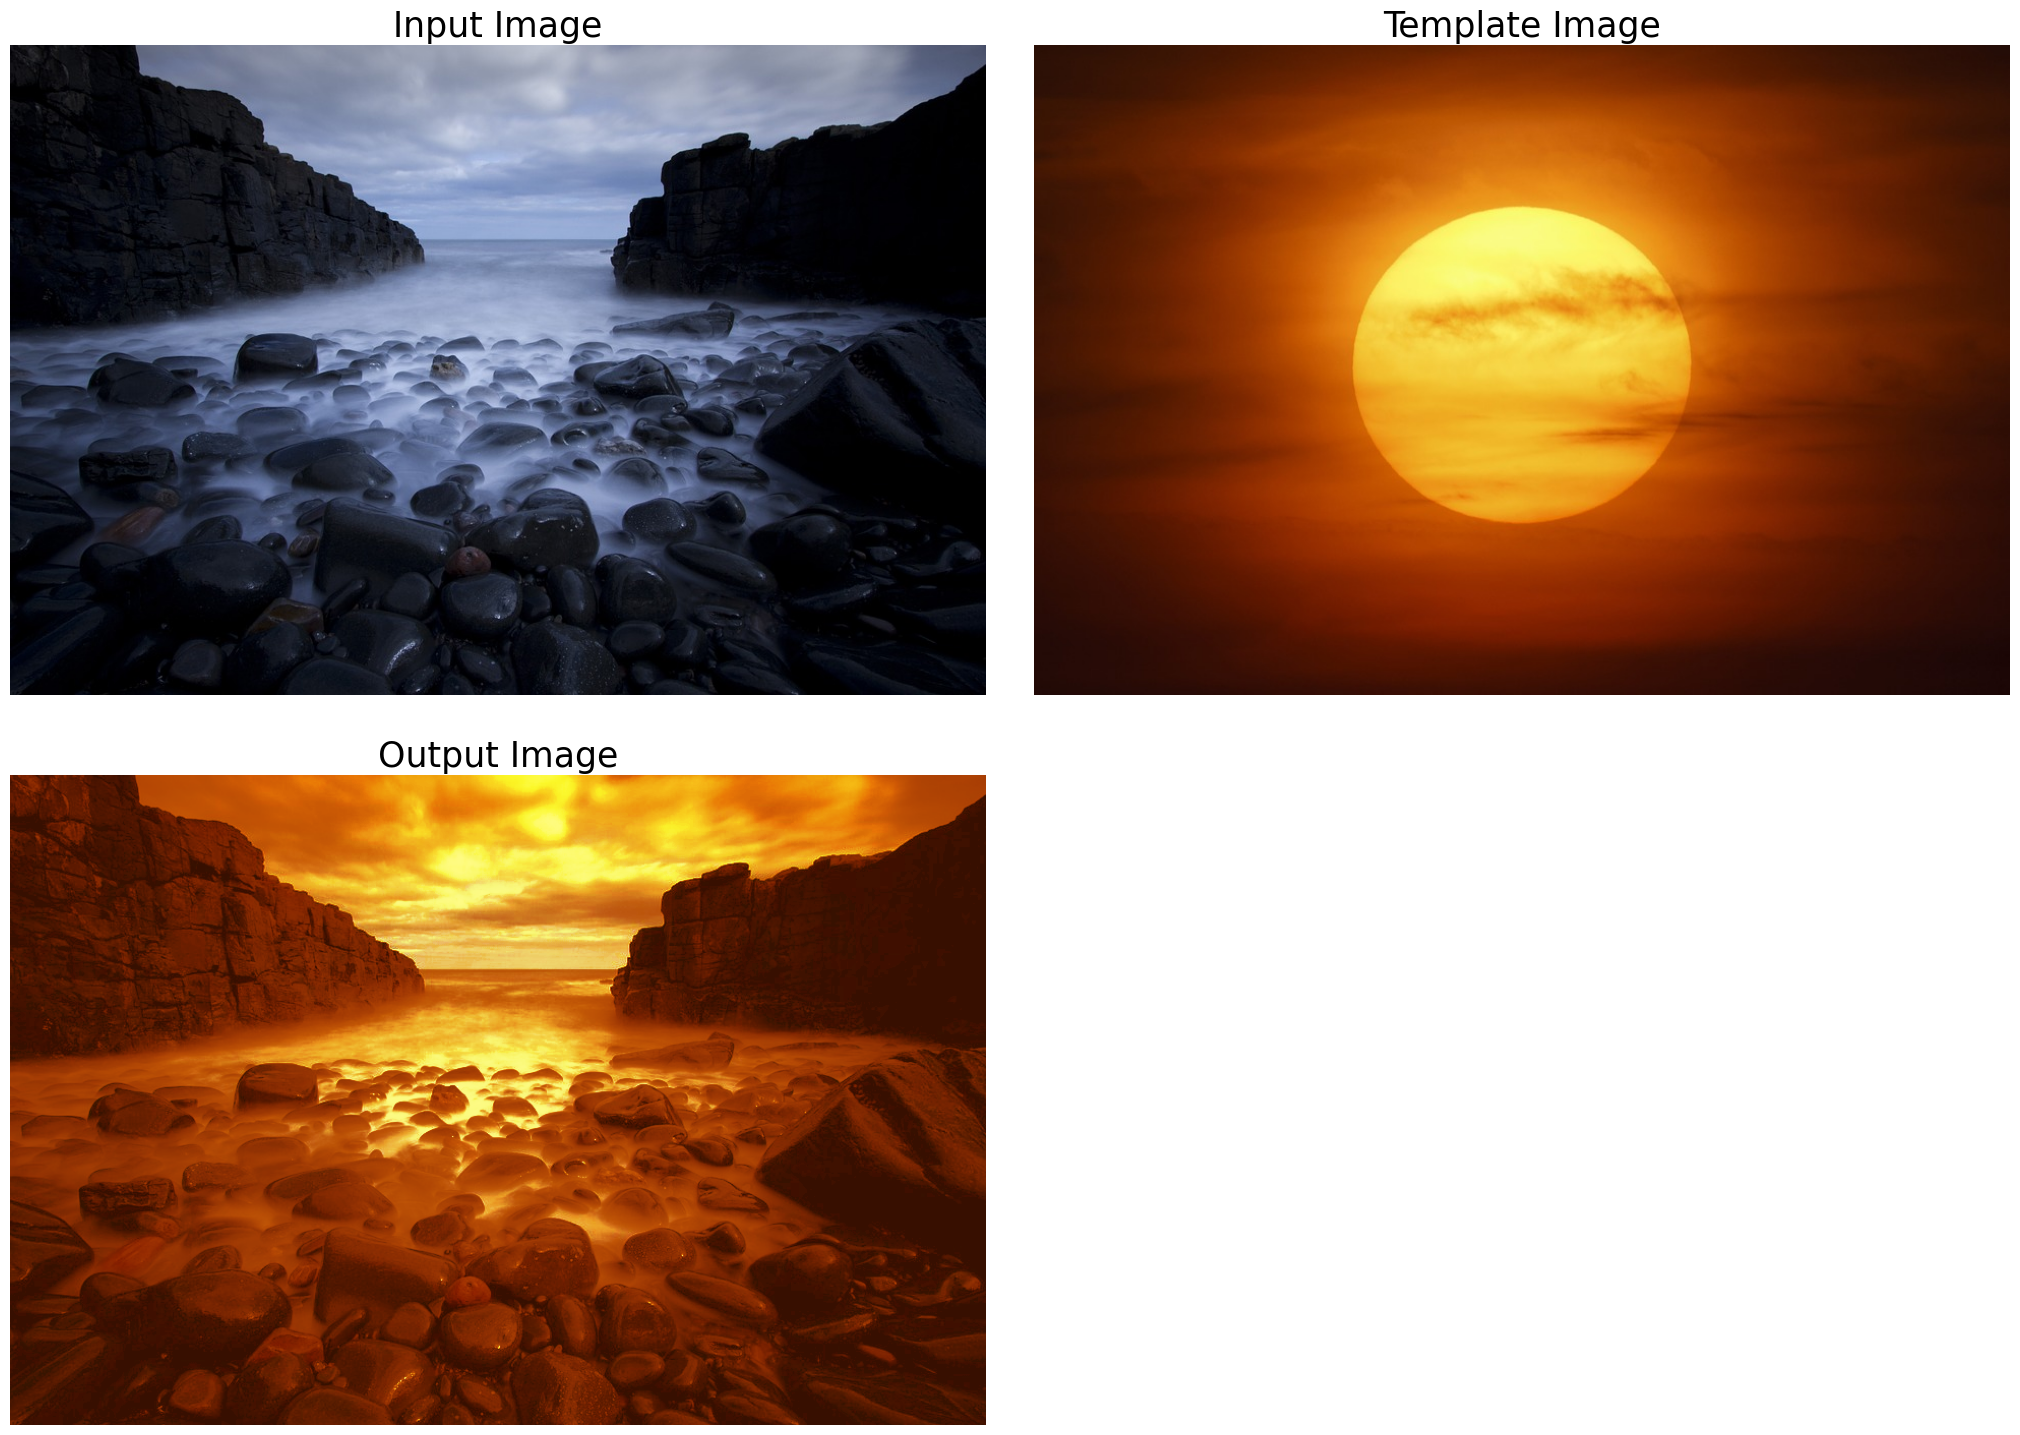

In [5]:
im = imread('images/rocks.png').astype(np.uint8)
im_t = imread('images/sun.png')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])

plt.figure(figsize=(20,15))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(223), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

### Edge Detection with Canny, LOG / Zero-Crossing and Wavelets

Ирмэг илрүүлэх нь зураг дээрх объектын ирмэг буюу хил хязгаарыг илрүүлэх, тодруулахад ашигладаг дүрс боловсруулах үндсэн арга юм.

1. `Канни ирмэг илрүүлэгч:` Canny ирмэг илрүүлэгч нь зургийн ирмэгийг илрүүлэх түгээмэл арга юм. Энэ нь эхлээд Гауссын шүүлтүүр ашиглан дүрсийг жигдрүүлж, дуу чимээг багасгаж, дараа нь Собел оператор ашиглан зургийн градиентийг тооцоолж, эцэст нь ирмэгийг сийрэгжүүлэх, гистерезисын босго тогтоох замаар хүчтэй, сул ирмэгийг илрүүлэх зэргээр ажилладаг. Canny ирмэг илрүүлэгч нь өндөр нарийвчлалтай, алдаа багатайгаараа алдартай.


2. `Laplacian of Gaussian (LOG) or zero crossing`: Энэ нь зургийн ирмэгийг сайжруулахын тулд эхлээд Laplacian of Gaussian шүүлтүүрийг түрхэж, дараа нь шүүсэн зураг дээрх тэг огтлолыг илрүүлж ирмэгийг олох замаар ажилладаг. LOG арга нь янз бүрийн өргөн, чиглэлийн ирмэгийг илрүүлэх чадвараараа алдартай.


3. `Wavelet-based methods:` Wavelet-based methods нь дүрсийг давтамжийн бүрэлдэхүүн хэсэг болгон задлах долгионы хувиргалтыг ашигладаг. Зургийн давтамжийн агуулгад дүн шинжилгээ хийснээр долгионд суурилсан аргууд нь ирмэгийг олон масштаб, чиг баримжаагаар илрүүлж чаддаг. Ирмэгийг илрүүлэх долгионд суурилсан түгээмэл аргууд нь continuous wavelet transform (CWT), discrete wavelet transform (DWT), dual-tree complex wavelet transform (DTCWT) юм.

In [6]:
# !pip install SimpleITK

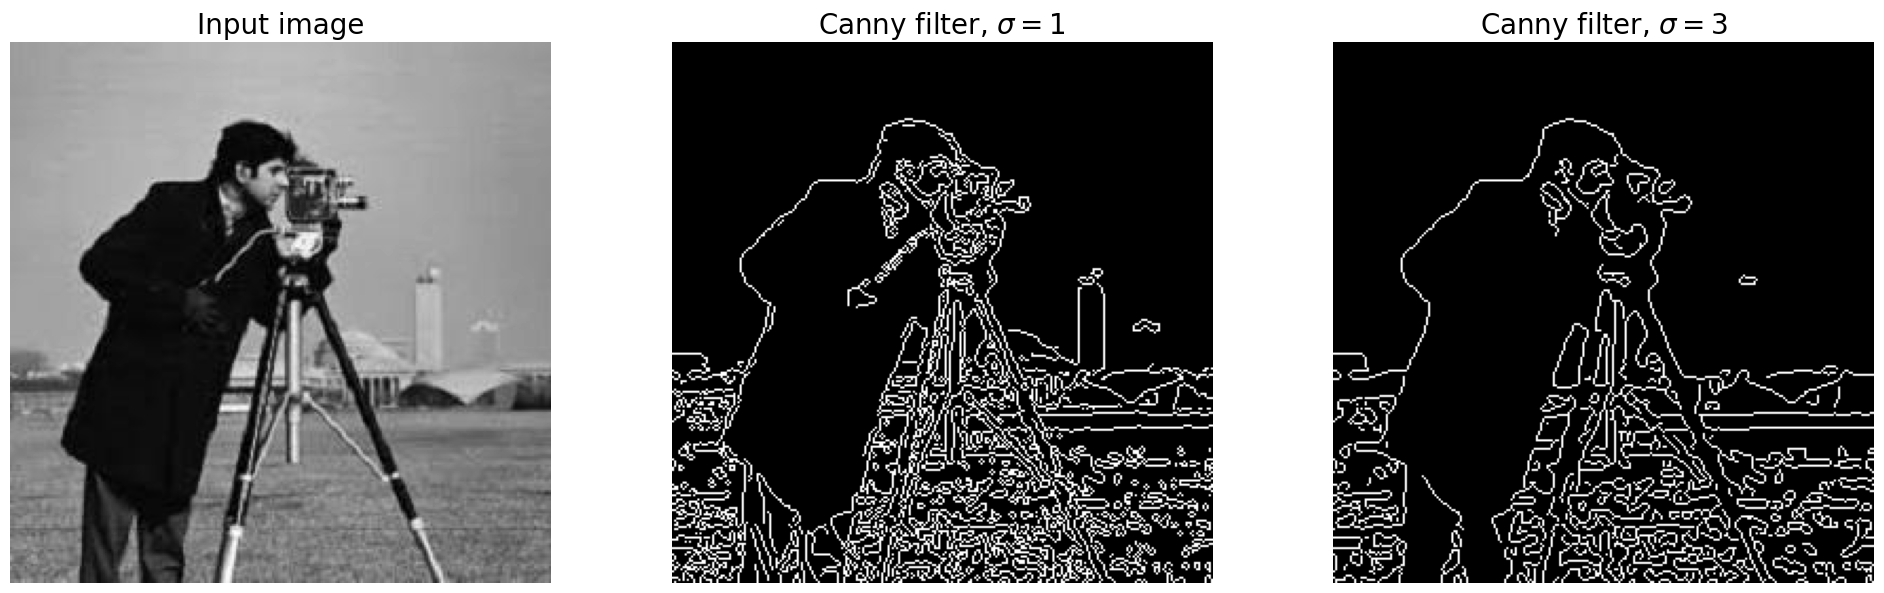

In [7]:
import matplotlib.pyplot as plt
import SimpleITK as sitk

image = sitk.ReadImage('images/cameraman.png',sitk.sitkInt8) # 8-bit cameraman grayscale image
image = sitk.Cast(image, sitk.sitkFloat64)

# Compute the Canny filter for two values of sigma
edges1 = sitk.CannyEdgeDetection(image, lowerThreshold=5, upperThreshold=10, variance=[1, 1])
edges2 = sitk.CannyEdgeDetection(image, lowerThreshold=5, upperThreshold=10, variance=[3, 3])

# Convert to numpy array for display
image = sitk.GetArrayFromImage(image)
edges1 = sitk.GetArrayFromImage(edges1)
edges2 = sitk.GetArrayFromImage(edges2)

# display results
fig = plt.figure(figsize=(20, 6))

plt.subplot(131), plt.imshow(image.astype(np.uint8), cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image', fontsize=20)
plt.subplot(132), plt.imshow(edges1, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=1$', fontsize=20)
plt.subplot(133), plt.imshow(edges2, cmap=plt.cm.gray), plt.axis('off'), plt.title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [8]:
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

def any_neighbor_zero(img, i, j):
    for k in range(-1,2):
      for l in range(-1,2):
         if img[i+k, j+k] == 0:
            return True
    return False

def zero_crossing(img):
  img[img > 0] = 1
  img[img < 0] = 0
  out_img = np.zeros(img.shape)
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
      if img[i,j] > 0 and any_neighbor_zero(img, i, j):
        out_img[i,j] = 255
  return out_img

img = rgb2gray(imread('images/tiger.png'))

print(np.max(img))
fig = plt.figure(figsize=(25,15))
plt.gray() # show the filtered result in grayscale
for sigma in range(2,10, 2):
    plt.subplot(2,2,sigma/2)
    result = ndimage.gaussian_laplace(img, sigma=sigma)
    result = zero_crossing(result)
    plt.imshow(result)
    plt.axis('off')
    plt.title('LoG with zero-crossing, sigma=' + str(sigma), size=30)

plt.tight_layout()
plt.show()

1.0


ValueError: num must be 1 <= num <= 4, not 1.0

<Figure size 2500x1500 with 0 Axes>

In [ ]:
#% matplotlib inline
import pywt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import matplotlib.pylab as plt
# Load image
original = rgb2gray(imread('images/ed-deir.png'))
#original = pywt.data.camera()
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(15, 12))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    a = abs(a)
    #a = np.clip(a, 0, 1)
    if i > 0:
        th = threshold_otsu(a)
        a[a > th] = 1
        a[a <= th] = 0
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

### Edge Detection with Anisotropic Diffusion

Энэ нь ирмэг болон бусад өндөр тодосгогч шинж чанаруудыг хадгалахын зэрэгцээ зургийг давтах замаар жигд болгодог. Анизотроп тархалтын үндсэн санаа нь зураг дээр тархалтын тэгшитгэлийг ашиглах явдал юм, гэхдээ зургийн градиентаас хамааран өөр өөр байдаг diffusion коэффициенттэй. Ирмэг зэрэг өндөр налуутай газруудад тархалтын коэффициент бага байдаг бөгөөд энэ нь гөлгөр байдлыг багасгаж, ирмэгийг хадгалдаг. Хавтгай бүс гэх мэт градиент багатай газруудад тархалтын коэффициент өндөр байдаг бөгөөд энэ нь илүү жигд болгох боломжийг олгодог.

In [ ]:
# !pip install medpy

In [ ]:
from medpy.filter.smoothing import anisotropic_diffusion
from skimage.util import random_noise
import matplotlib.pylab as plt
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

img = rgb2gray(imread('images/colosseum.png'))
plt.figure(figsize=(20,10))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.05,0.05)
plt.subplot(121), plt.imshow(img), plt.axis('off'), plt.title('Original', size=20)
diff_out = anisotropic_diffusion(img, niter=50, kappa=20, option=1)
plt.subplot(122), plt.imshow(np.clip(diff_out-img,0,1)), plt.axis('off')
plt.title(r'Edges with Anisotropic Diffusion (Perona Malik, $\kappa=20$)', size=20)
plt.show()

### Image Denoising with Denoising Autoencoder

In [ ]:
# !pip install torchviz

In [ ]:
import torchvision, matplotlib, sklearn, torch, numpy as np
print(np.__version__, torch.__version__, matplotlib.__version__, sklearn.__version__) #torchvision.__version__, 

### Image Denoising with Principal Component Analysis (PCA), Discrete Fourier / Wavelet Tranform (FFT, DWT)

In [ ]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from skimage.util import random_noise
from skimage import img_as_float
from time import time
import scipy.fftpack as fp
import pywt

n_components = 50 # 256
image_shape = (64, 64)
rng = RandomState(0)

dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
original = img_as_float(dataset.data)
faces = original.copy()
print(faces.shape)

n_samples, n_features = faces.shape
#mean_face = faces.mean(axis=0)
#faces = faces - mean_face
faces = random_noise(faces, var=0.005)

estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
print("Extracting the top %d PCs..." % (n_components))
t0 = time()
faces_recons = estimator.inverse_transform(estimator.fit_transform(faces)) #.T #+ mean_face #.T
train_time = (time() - t0)
print("done in %0.3fs" % train_time)

indices = np.random.choice(n_samples, 5, replace=False)
plt.figure(figsize=(20,4))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(original[indices[i],:], image_shape)), plt.axis('off')
plt.suptitle('Original', size=25)
plt.show()

#faces = faces + mean_face
plt.figure(figsize=(20,4))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(faces[indices[i],:], image_shape)), plt.axis('off')
plt.suptitle('Noisy', size=25)
plt.show()

plt.figure(figsize=(20,4))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(faces_recons[indices[i],:], image_shape)), plt.axis('off')
plt.suptitle('PCA reconstruction with {} components (eigenfaces)'.format(n_components), size=25)
plt.show()

n_components = 30 
plt.figure(figsize=(20,4))
for i in range(len(indices)):
    freq = fp.fftshift(fp.fft2((np.reshape(faces[indices[i],:], image_shape)).astype(float)))
    freq[:freq.shape[0]//2 - n_components//2,:] = freq[freq.shape[0]//2 + n_components//2:,:] = 0
    freq[:, :freq.shape[1]//2 - n_components//2] = freq[:, freq.shape[1]//2 + n_components//2:] = 0
    plt.subplot(1,5,i+1), plt.imshow(fp.ifft2(fp.ifftshift(freq)).real), plt.axis('off')
plt.suptitle('FFT LPF reconstruction with {} basis vectors'.format(n_components), size=25)
plt.show()

plt.figure(figsize=(20,4))
wavelet = pywt.Wavelet('haar')
for i in range(len(indices)):
    wavelet_coeffs = pywt.wavedec2((np.reshape(faces[indices[i],:], image_shape)).astype(float), wavelet)
    plt.subplot(1,5,i+1), plt.imshow(pywt.waverec2(wavelet_coeffs[:-1], wavelet)), plt.axis('off')
plt.suptitle('Wavelet reconstruction with {} subbands'.format(len(wavelet_coeffs)-1), size=25)
plt.show()

### Gradient Blending

In [ ]:
import cv2
print(cv2.__version__) # make sure the major version of OpenCV is 3
# 3.4.2
import numpy as np
# read source and destination images
src = cv2.imread("images/liberty.png")
dst = cv2.imread("images/victoria.png")
# read the mask image
src_mask = cv2.imread("images/cmask.png")
print(src.shape, dst.shape, src_mask.shape)
# (480, 360, 3) (576, 768, 3) (480, 360, 3)
# this is where the CENTER of the airplane will be placed
center = (275,250) 
# clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.MIXED_CLONE)
# save result
cv2.imwrite("images/liberty_victoria.png", output)

![](images/gradient_out.png)

### Improving Image Contrast

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.exposure import equalize_hist, equalize_adapthist

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title, size=20)
    plt.axis('off')
    
def plot_hist(img):
    colors = ['r', 'g', 'b']
    cdf = np.zeros((256,3))
    for i in range(3):
        hist, bins = np.histogram(img[...,i].flatten(),256,[0,256], normed=True)
        cdf[...,i] = hist.cumsum()
        cdf_normalized = cdf[...,i] * hist.max() / cdf.max()
        plt.plot(cdf_normalized, color = colors[i], label='cdf ({})'.format(colors[i]))
        #plt.hist(img[...,i].flatten(),256,[0,256], color = colors[i], density=True)
        binWidth = bins[1] - bins[0]
        plt.bar(bins[:-1], hist*binWidth, binWidth, label='hist ({})'.format(colors[i]))
        plt.xlim([0,256])
    plt.legend(loc = 'upper left')
    return cdf

img = imread('images/train.png')
#print(np.max(img))

plt.figure(figsize=(20,40))
#plt.gray()

plt.subplot(421), plot_image(img, 'Original Image')
plt.subplot(422) 
cdf = plot_hist(img)

img2 = np.copy(img)
for i in range(3):
    cdf_m = np.ma.masked_equal(cdf[...,i],0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    #cdf_m = 255 * cdf / cdf[-1] # normalize
    cdf2 = np.ma.filled(cdf_m,0).astype('uint8')
    img2[...,i] = cdf2[img[...,i]]

plt.subplot(423), plot_image(img2, 'Hist. Equalized')
plt.subplot(424), plot_hist(img2)

equ = (255*equalize_hist(img)).astype(np.uint8)
plt.subplot(425), plot_image(equ, 'Hist. Equalized (scikit-image)')
plt.subplot(426), plot_hist(equ)


equ = (255*equalize_adapthist(img)).astype(np.uint8)
plt.subplot(427), plot_image(equ, 'Adaptive Hist. Equalized (scikit-image)')
plt.subplot(428), plot_hist(equ)

plt.savefig('images/hist_out.png', bbox_in='tight', pad_in=0)

plt.show()

### Image Denoising with Anisotropic Diffusion

In [ ]:
from medpy.filter.smoothing import anisotropic_diffusion
from skimage.util import random_noise
import matplotlib.pylab as plt
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

img = rgb2gray(imread('images/cameraman.png'))
noisy = random_noise(img, var=0.01)
noisy = np.clip(noisy, 0, 1)
plt.figure(figsize=(15,15))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.05,0.05)
plt.subplot(221), plt.imshow(img), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(222), plt.imshow(noisy), plt.axis('off'), plt.title('Noisy', size=20)
diff_out = anisotropic_diffusion(noisy, niter=20, kappa=20, option=1)
plt.subplot(223), plt.imshow(diff_out), plt.axis('off'), plt.title(r'Anisotropic Diffusion (Perona Malik eq 1, iter=20, $\kappa=20$)', size=18)
diff_out = anisotropic_diffusion(noisy, niter=50, kappa=100, option=2)
plt.subplot(224), plt.imshow(diff_out), plt.axis('off'), plt.title(r'Anisotropic Diffusion (Perona Malik eq 2, iter=50, $\kappa=50$)', size=18)
plt.show()

In [ ]:
img = imread('images/coin_orig.jpg')
plt.imshow(img)
plt.plot()

# Motion Blur

In [ ]:
import numpy as np
import cv2
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

# f(x,y), input image in spatial domain
f = cv2.imread('images/coin_orig.jpg', 0)

f = f/f.max() # normalize

# F(u,v), image in frequency domain
F = np.fft.fft2(f)

plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

# H(u,v), motion blur function in frequency domain
# Create matrix H (motion blur function H(u,v))
M,N = F.shape 
H = np.zeros((M+1,N+1), dtype=np.complex128) # +1 to avoid zero division

# Motion blur parameters
T = 0.9 # duration of exposure
a = 0 # vertical motion
b = 0.09 # horizontal motion

# Fill matrix H
for u in range(1,M+1):
    for v in range(1,N+1):
        s = np.pi*(u*a + v*b)
        H[u,v] = (T/s) * np.sin(s) * np.exp(-1j*s)

# index slicing
H = H[1:,1:]     
   
# G(u,v), blurred image in frequency domain
G = H * F

# g(x,y), blurred image in spatial domain
g = np.fft.ifft2(G)
g = np.abs(g)

blur = img_as_ubyte(g) # if you want to save the image

plt.imshow(blur)
plt.axis('off')
plt.show()

# Add noise

In [ ]:
noisy = random_noise(blur, var=0.001)
# noisy = np.clip(noisy, 0, 1)
plt.imshow(noisy)
plt.plot()

# Даалгавар 1 Image denoising
noisy зурагыг ашиглан анхны зургыг сэргээх буюу шуугианыг багасгах, арилгах.

In [ ]:
# your code here

# Gaussian filtering:
denoised = gaussian_filter(noisy, sigma=2)

# Median filtering:
denoised = median_filter(noisy, size=3)

denoised = denoise_tv_chambolle(noisy, weight=0.1)

denoised = denoise_nl_means(noisy, h=0.1, patch_size=5, patch_distance=6)

coeffs = pywt.wavedec2(noisy, wavelet='haar', level=1)
coeffs = [pywt.threshold(c, value=0.1, mode='soft') for c in coeffs]
denoised = pywt.waverec2(coeffs, wavelet='haar')


accuracy = np.sum(abs(noisy - blur))/(img.shape[0]*img.shape[1]*img.shape[2])
print("{0:.2f}%".format(100 - accuracy))

# Даалгавар 2 Image enhancement Demotion blur

In [ ]:
# your code here

demotion = blur # энд боловсруулалт хийсэн зураг blur оронд бичнэ
accuracy = np.sum(abs(f - demotion))/(img.shape[0]*img.shape[1]*img.shape[2])
print("{0:.2f}%".format(100 - accuracy))

# Даалгавар 3 Сэргээсэн зургийг perspectiveTransform хийж бичгийн заасыг дүрслэх
Лаборатори 2,3

In [ ]:
# your code here

# Даалгавар 4 Хувиргасан зургаас зоосуудын байрлал тодорхойлох
Лаборатори 2,3

In [ ]:
# your code here

# Даалгавар 5 Тодорхойлсон зоосууд хоорондын зайг тодорхойлох

https://pyimagesearch.com/2016/04/04/measuring-distance-between-objects-in-an-image-with-opencv/

Reference object size = 22.6 mm япон улсын 100 еэний мөнгөн зоос

зайг хэмжсэн зураг дүрслэн болон хэмжилтийн үр дүнгүүдийг хүснэгтэнд бөглөн алдааг тооцоолон илгээнэ үү

In [ ]:
# your code here

In [ ]:
img = imread('images/calibrated.jpg')
plt.imshow(img)
plt.show()

# Result
Ground truth бодит амьдрал дээрхи хэмжсэн зай

Calculated distance тооцоолж олсон зай

Loss алдаа

| Objects | Calculated distance[cm] |Ground truth[cm]|Loss [cm]|
|---------|------------------------------------------------|------|-----|
| 1-2     | 9.3                                            | 11.7 | 2.4 |
| 1-3     | 8.4                                            | 9.5  | 1.1 |
| 1-4     | 15.7                                           | 19.7 | 4.0 |
| 1-5     | 12.5                                           | 13.8 | 1.3 |
| 1-6     | 15.8                                           | 18.5 | 2.7 |
| 1-7     | 22                                             | 28   | 6   |
| 1-8     | 21.6                                           | 23.5 | 2.1 |

# Хугацаа 3 долоо хоног

овог нэр:

код:

# Дүгнэлт (300 хүртэлх үгтэй)

